In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("scraped_retail_data.csv")

After having collected all the data we need to make sure each column has data in the same format
After analysing the Date column we can see the date isn't always kept in the same format s we need to make sure it's consistent

In [2]:
df.loc[11:12,'Date of Sale']

11     2024-01-02
12    03 Jan 2024
Name: Date of Sale, dtype: object

In [3]:
def consistent_date(df):
    for i in range(0, len(df['Date of Sale'])):
        if " " in df['Date of Sale'][i]:
            time = datetime.strptime(df['Date of Sale'][i], '%d %b %Y').date()
            date_time = time.strftime("%Y-%m-%d")
            df['Date of Sale'][i] = date_time
    if 'Unnamed: 0' in df.columns.values:
        df = df.drop("Unnamed: 0", axis=1)
    df['Date of Sale'] = pd.to_datetime(df['Date of Sale'])
    return df
df = consistent_date(df)

C:\Users\rgroa\AppData\Local\Temp\ipykernel_1380\2472817578.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date of Sale'][i] = date_time


We now have our dates kept consistent:

In [4]:
df.loc[11:12,'Date of Sale']

11   2024-01-02
12   2024-01-03
Name: Date of Sale, dtype: datetime64[ns]

The Quantity column also has incorrect data, some of the quantities are marked as negative values.
An assumption is made for the negative symbol was added by accident due to there being a profit made on those sales. Simply removing the negative symbol is what will be done to rectify this inconsistency.

In [5]:
df.loc[23,'Quantity']

-1

In [6]:
def no_negative_quantities(df):
    for i in range(0, len(df['Quantity'])):
        if df['Quantity'][i] < 1:
            df['Quantity'][i] = df['Quantity'][i] * -1
    if 'Unnamed: 0' in df.columns.values:
        df = df.drop("Unnamed: 0", axis=1)
    return df
df = no_negative_quantities(df)

C:\Users\rgroa\AppData\Local\Temp\ipykernel_1380\934854556.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'][i] = df['Quantity'][i] * -1


The Quantity column now only shows positive values. We check this by examining a previously negative quantity and seeing now marked as positive:

In [7]:
df.loc[23,'Quantity']

1

We must now clean the Total Price(TP) and Payment Type(PT) columns. The TP column has some indentation errors and the PT has two notation for Credit Card the first being Credit Card and the second being CC. First we will clean the PT column.

In [8]:
df.loc[0:1,'Payment Type']

0    Credit Card
1             CC
Name: Payment Type, dtype: object

In [9]:
def Credit_Card_not_CC(df):
    for i in range(0, len(df['Payment Type'])):
        if df['Payment Type'][i] == "CC":
            df['Payment Type'][i] = "Credit Card"
    if 'Unnamed: 0' in df.columns.values:
        df = df.drop("Unnamed: 0", axis=1)
    return df
df = Credit_Card_not_CC(df)

C:\Users\rgroa\AppData\Local\Temp\ipykernel_1380\4197407004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Payment Type'][i] = "Credit Card"


In [10]:
df.loc[0:1,'Payment Type']

0    Credit Card
1    Credit Card
Name: Payment Type, dtype: object

We can now take care of the incorrect indentation in the Total Price column:

In [11]:
df.loc[25:26,'Total Price']
print(df["Total Price"][26])

€ 13.50


In [12]:
def remove_indent_Total_Price(df):
    for i in range(0, len(df['Total Price'])):
        if ' ' in df['Total Price'][i]:
            df['Total Price'][i] = df['Total Price'][i].replace(' ','')
    if 'Unnamed: 0' in df.columns.values:
        df = df.drop("Unnamed: 0", axis=1)
    return df
df = remove_indent_Total_Price(df)

C:\Users\rgroa\AppData\Local\Temp\ipykernel_1380\588236248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Price'][i] = df['Total Price'][i].replace(' ','')


In [13]:
df.loc[25:26,'Total Price']

25    €189.00
26     €13.50
Name: Total Price, dtype: object

The age column also includes blank values (None), these need to be replaced. Since there is no guessing what age group they might belong to, we can rename the age group Undisclosed 

In [14]:
df.loc[121,'Customer Age Category']

'None'

In [15]:
def age_None_to_Undisclosed(df):
    for i in range(0, len(df['Customer Age Category'])):
        if df['Customer Age Category'][i] == 'None':
            df['Customer Age Category'][i] = 'Undisclosed'
    if 'Unnamed: 0' in df.columns.values:
        df = df.drop("Unnamed: 0", axis=1)
    return df
df = age_None_to_Undisclosed(df)

C:\Users\rgroa\AppData\Local\Temp\ipykernel_1380\3329500223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer Age Category'][i] = 'Undisclosed'


In [16]:
df.loc[121,'Customer Age Category']

'Undisclosed'

The final step is to remove the euro symbol in the Total Price and Total Profit and then convert all the value to integer.

In [17]:
def remove_euro(df):
    for i in range(0, len(df['Total Price'])):
        df['Total Price'][i] = df['Total Price'][i].replace('€','')
        df['Total Profit'][i] = df['Total Profit'][i].replace('€','')
    if 'Unnamed: 0' in df.columns.values:
        df = df.drop("Unnamed: 0", axis=1)
    df['Total Profit'] = pd.to_numeric(df['Total Profit'])
    df['Total Price'] = pd.to_numeric(df['Total Price'])
    return df
df = remove_euro(df)

C:\Users\rgroa\AppData\Local\Temp\ipykernel_1380\2213605250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Price'][i] = df['Total Price'][i].replace('€','')
C:\Users\rgroa\AppData\Local\Temp\ipykernel_1380\2213605250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Profit'][i] = df['Total Profit'][i].replace('€','')


In [18]:
print(type(df['Total Price'][26]))
print(type(df['Total Profit'][26]))

<class 'numpy.float64'>
<class 'numpy.float64'>


We can now start visualising the data. We will start by looking at the total sales every month of 2024:

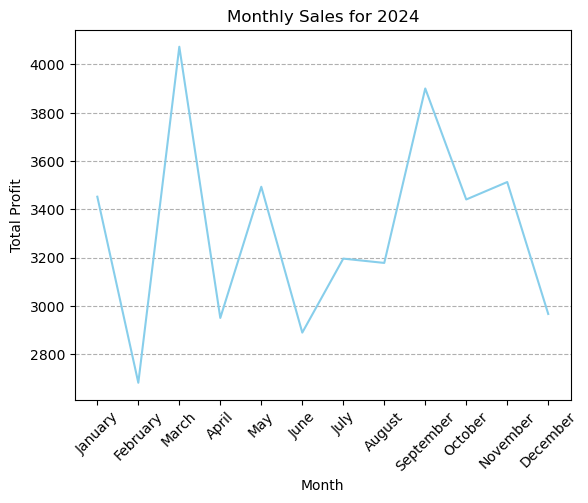

In [19]:
monthly_sales = df.groupby(df['Date of Sale'].dt.month_name(), sort=False)['Total Profit'].sum()

month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

monthly_sales.plot(kind='line', color='skyblue')
plt.xticks(ticks=range(12), labels=month_order, rotation=45)

plt.title('Monthly Sales for 2024')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.xticks()
plt.show()

We can also look at what gender group and age group is the biggest demographic. If people left their age undisclosed will no be taken into account in this plot.

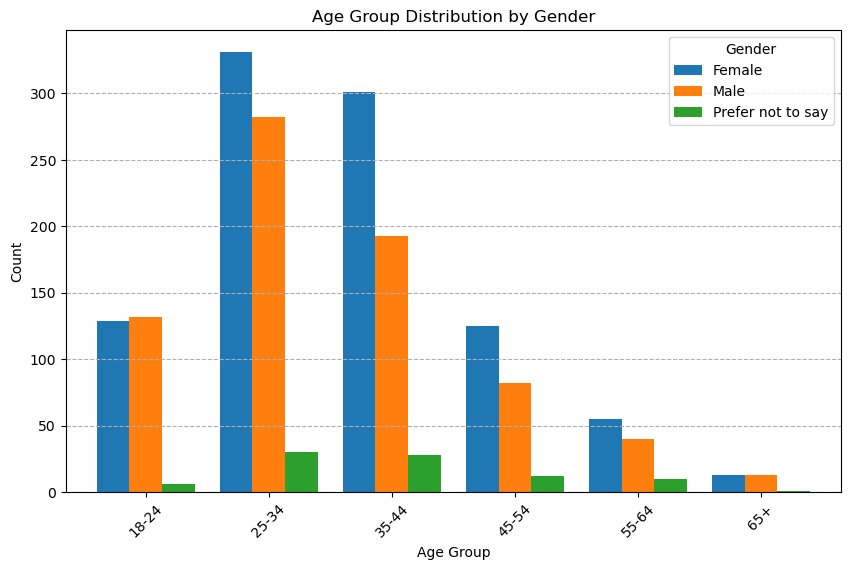

In [20]:
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']


age_gender_counts = df[df['Customer Age Category'] != 'Undisclosed'].groupby(['Customer Age Category', 'Customer Gender']).size().unstack(fill_value=0)

age_gender_counts = age_gender_counts.reindex(age_order)
ax = age_gender_counts.plot(kind='bar', figsize=(10,6), width=0.8)

plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--')

plt.show()

We can also look at the 10 counties the most customers come from, and the 10 with the fewest customers that come from.

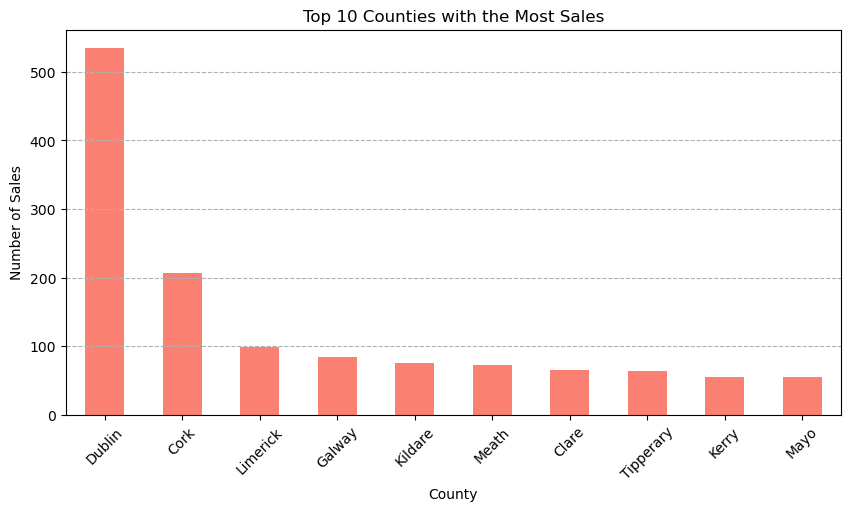

In [21]:
county_counts = df['Customer Location'].value_counts()
least_sales_counties = county_counts.nlargest(10)

plt.figure(figsize=(10,5))
least_sales_counties.plot(kind='bar', color='salmon')

plt.title('Top 10 Counties with the Most Sales')
plt.xlabel('County')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

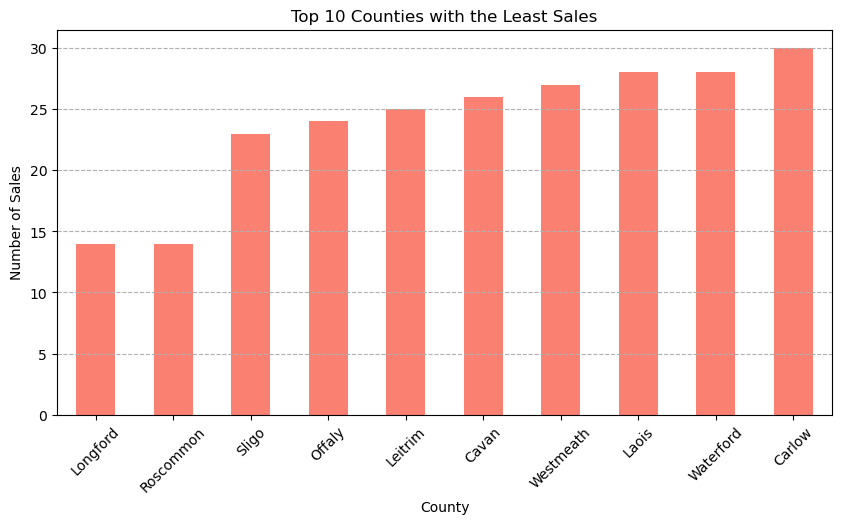

In [22]:
county_counts = df['Customer Location'].value_counts()
least_sales_counties = county_counts.nsmallest(10)

plt.figure(figsize=(10,5))
least_sales_counties.plot(kind='bar', color='salmon')

plt.title('Top 10 Counties with the Least Sales')
plt.xlabel('County')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

# Conclusion:

In this assignment we looked at the sales of a retail store in Ireland. When scraping the data an initial challenge was faced. The customer information was not saved in a consistent order. This made it so when reading in the customer information the data had to be split and sorted to make sure it was always in the same order. The customer details also being one large string made breaking it down more complicated.
The second issue was finding the data inconsistencies. It's still hard to tell if they were all taken care of. Once the issues are found, they aren't hard to fix. An example of this is the Age column, some of the values were None, not in the None data format, but as a String. This made it so using isnull() didn't work. This was only noticed when looking at the unique values of the age column to visualise the age and gender group with the most people.

After having scraped and cleaned the data, it could be visualised. It was very quick to see March is the month with the most sales by far. Additionally, women between the age 25-34 are responsible for the most sales, closely followed by men of the same age group. We can also see that of the few customer over the age of 64, very few of them left their age as Prefer not to Say. So people from that group are responsible for the fewest sales. 
Looking at the last two visualisation we can see that people from Dublin are responsible for the majority of the sales. Dublin's sales are mor than double of what second place is. We can also see Longford have the fewest sales. Using this data, depending on what the company wants to do, they can focus more on Dublin and have more stores there or, make more stores available in the counties with the fewest sales.

Now for what one could do in addition there isn't that much. Since not much context is given for the data, it's hard to make any assumptions. We can see where a customer is from, but not where the product was purchased. We don't know if these are the sales of one shop or from all the shops in Ireland. Due to the sales number we can assume it is one shop, most likely situated in Dublin, but this is only assumed after visualisation of the data. If more data and information is given there could be much more analysis done. From what is available, the only remaining analysis to be done is to see which product type sells the most. Is it women's clothing, men's clothing, homeware product.